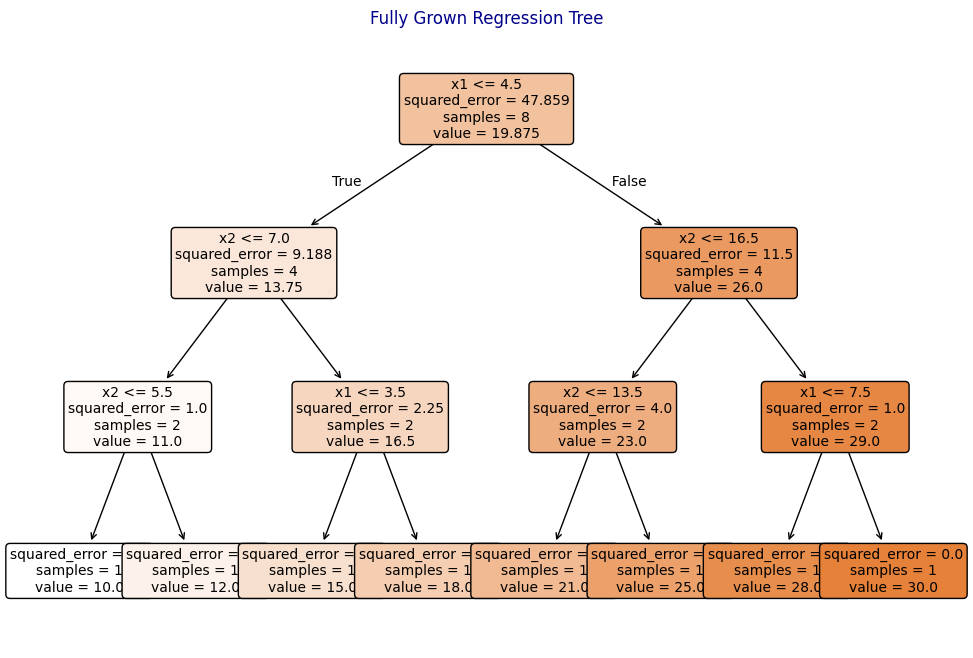

Tree Depth: 3, Number of Leaves: 8


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Create the dataset
data = {
    'x1': [1, 2, 3, 4, 5, 6, 7, 8],
    'x2': [5, 6, 8, 10, 12, 15, 18, 20],
    'y':  [10, 12, 15, 18, 21, 25, 28, 30]
}
df = pd.DataFrame(data)

# Define input features and target variable
features = df[['x1', 'x2']]
target = df['y']

# Train a fully grown regression tree
regressor = DecisionTreeRegressor(min_samples_split=2, min_samples_leaf=1, random_state=25)
regressor.fit(features, target)

# Visualize the regression tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, feature_names=['x1', 'x2'], filled=True, rounded=True, fontsize=10)
plt.title('Fully Grown Regression Tree', color='darkblue')
plt.show()

# Display tree depth and number of leaves
print(f"Tree Depth: {regressor.get_depth()}, Number of Leaves: {regressor.get_n_leaves()}")


Original Dataset:
    price maintenance  capacity airbag profitable
0    low         low         2     no        yes
1    low         med         4    yes         no
2    low         low         4     no        yes
3    low        high         4     no        yes
4    med         med         4     no         no
5    med         med         4    yes        yes
6    med        high         2    yes         no
7    med        high         5     no        yes
8   high         med         4    yes        yes
9   high        high         2    yes         no
10  high        high         5    yes        yes 

Encoded Dataset:
     price  maintenance  capacity  airbag  profitable
0       1            1         2       0           1
1       1            2         4       1           0
2       1            1         4       0           1
3       1            0         4       0           1
4       2            2         4       0           0
5       2            2         4       1           1
6 

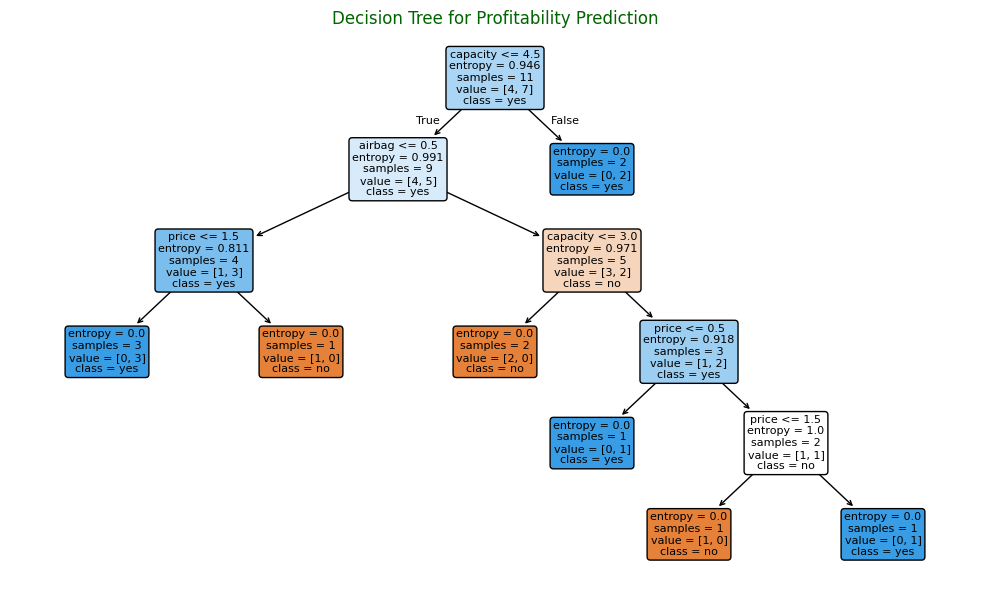

Tree Depth: 5
Number of Leaves: 7

Manual Entropy Calculations for Root Node:
Initial Entropy: 0.9457

Information Gain for 'price':
  Split at price = low: Info Gain = 0.0237
  Split at price = med: Info Gain = 0.0328
  Split at price = high: Info Gain = 0.0011

Information Gain for 'maintenance':
  Split at maintenance = low: Info Gain = 0.1348
  Split at maintenance = med: Info Gain = 0.0328
  Split at maintenance = high: Info Gain = 0.0034

Information Gain for 'capacity':
  Split at capacity <= 3.0: Info Gain = 0.1052
  Split at capacity <= 4.5: Info Gain = 0.1348

Information Gain for 'airbag':
  Split at airbag = no: Info Gain = 0.0721
  Split at airbag = yes: Info Gain = 0.0721

Predictions vs Actual:
Sample 1: Actual = yes, Predicted = yes
Sample 2: Actual = no, Predicted = no
Sample 3: Actual = yes, Predicted = yes
Sample 4: Actual = yes, Predicted = yes
Sample 5: Actual = no, Predicted = no
Sample 6: Actual = yes, Predicted = yes
Sample 7: Actual = no, Predicted = no
Sample 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Step 1: Define the original dataset
data = {
    'price': ['low', 'low', 'low', 'low', 'med', 'med', 'med', 'med', 'high', 'high', 'high'],
    'maintenance': ['low', 'med', 'low', 'high', 'med', 'med', 'high', 'high', 'med', 'high', 'high'],
    'capacity': [2, 4, 4, 4, 4, 4, 2, 5, 4, 2, 5],
    'airbag': ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes'],
    'profitable': ['yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes']
}

df = pd.DataFrame(data)
print("Original Dataset:\n", df, "\n")

# Step 2: Encode categorical variables
label_encoders = {
    'price': LabelEncoder(),
    'maintenance': LabelEncoder(),
    'airbag': LabelEncoder(),
    'profitable': LabelEncoder()
}

df_encoded = df.copy()
for col in label_encoders:
    df_encoded[col] = label_encoders[col].fit_transform(df[col])

print("Encoded Dataset:\n", df_encoded, "\n")

# Step 3: Train a decision tree classifier using entropy
X = df_encoded[['price', 'maintenance', 'capacity', 'airbag']]
y = df_encoded['profitable']

clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, min_samples_leaf=1, random_state=30)
clf.fit(X, y)

# Step 4: Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=['no', 'yes'],
          filled=True, rounded=True, fontsize=8)
plt.title('Decision Tree for Profitability Prediction', fontsize=12, color='darkgreen')
plt.tight_layout()
plt.show()

# Print tree metrics
print(f"Tree Depth: {clf.get_depth()}")
print(f"Number of Leaves: {clf.get_n_leaves()}\n")

# Step 5: Manual calculation of entropy and information gain
def entropy(values):
    classes, counts = np.unique(values, return_counts=True)
    probs = counts / len(values)
    return -np.sum(probs * np.log2(probs + 1e-10))

def info_gain(parent, left, right):
    n = len(parent)
    weighted_entropy = (len(left)/n) * entropy(left) + (len(right)/n) * entropy(right)
    return entropy(parent) - weighted_entropy

print("Manual Entropy Calculations for Root Node:")
print(f"Initial Entropy: {entropy(y):.4f}\n")

# Evaluate info gain for all features
for feature in X.columns:
    print(f"Information Gain for '{feature}':")

    if df[feature].dtype == 'object':
        for val in df[feature].unique():
            mask = df[feature] == val
            gain = info_gain(y, y[mask], y[~mask])
            print(f"  Split at {feature} = {val}: Info Gain = {gain:.4f}")
    else:
        thresholds = sorted(df[feature].unique())
        for i in range(len(thresholds) - 1):
            threshold = (thresholds[i] + thresholds[i+1]) / 2
            mask = df[feature] <= threshold
            gain = info_gain(y, y[mask], y[~mask])
            print(f"  Split at {feature} <= {threshold}: Info Gain = {gain:.4f}")
    print()

# Step 6: Predict and evaluate
predictions = clf.predict(X)
print("Predictions vs Actual:")
for i, (true_val, pred_val) in enumerate(zip(y, predictions)):
    actual = 'yes' if true_val == 1 else 'no'
    predicted = 'yes' if pred_val == 1 else 'no'
    print(f"Sample {i+1}: Actual = {actual}, Predicted = {predicted}")

# Step 7: Print accuracy
accuracy = (predictions == y).mean()
print(f"\nModel Accuracy: {accuracy:.4f}")


In [9]:
from google.colab import files

# Upload training data
print("Please upload the TRAINING data file (A4_train_...csv)")
uploaded_train = files.upload()

# Upload test data
print("\nPlease upload the TEST data file (A4_test_...csv)")
uploaded_test = files.upload()

# Get the file names
train_filename = list(uploaded_train.keys())[0]
test_filename = list(uploaded_test.keys())[0]

# Read the files into DataFrames
import pandas as pd
train_data = pd.read_csv(train_filename)
test_data = pd.read_csv(test_filename)

print(f"\nTraining data loaded: {train_data.shape}")
print(f"Test data loaded: {test_data.shape}")

Please upload the TRAINING data file (A4_train_...csv)


Saving A4_train_74e601c5-f446-4f34-a53b-28ce05d1cec4.csv to A4_train_74e601c5-f446-4f34-a53b-28ce05d1cec4 (1).csv

Please upload the TEST data file (A4_test_...csv)


Saving A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705.csv to A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705 (1).csv

Training data loaded: (210, 3)
Test data loaded: (90, 3)


Train shape: (210, 2), Test shape: (90, 2)


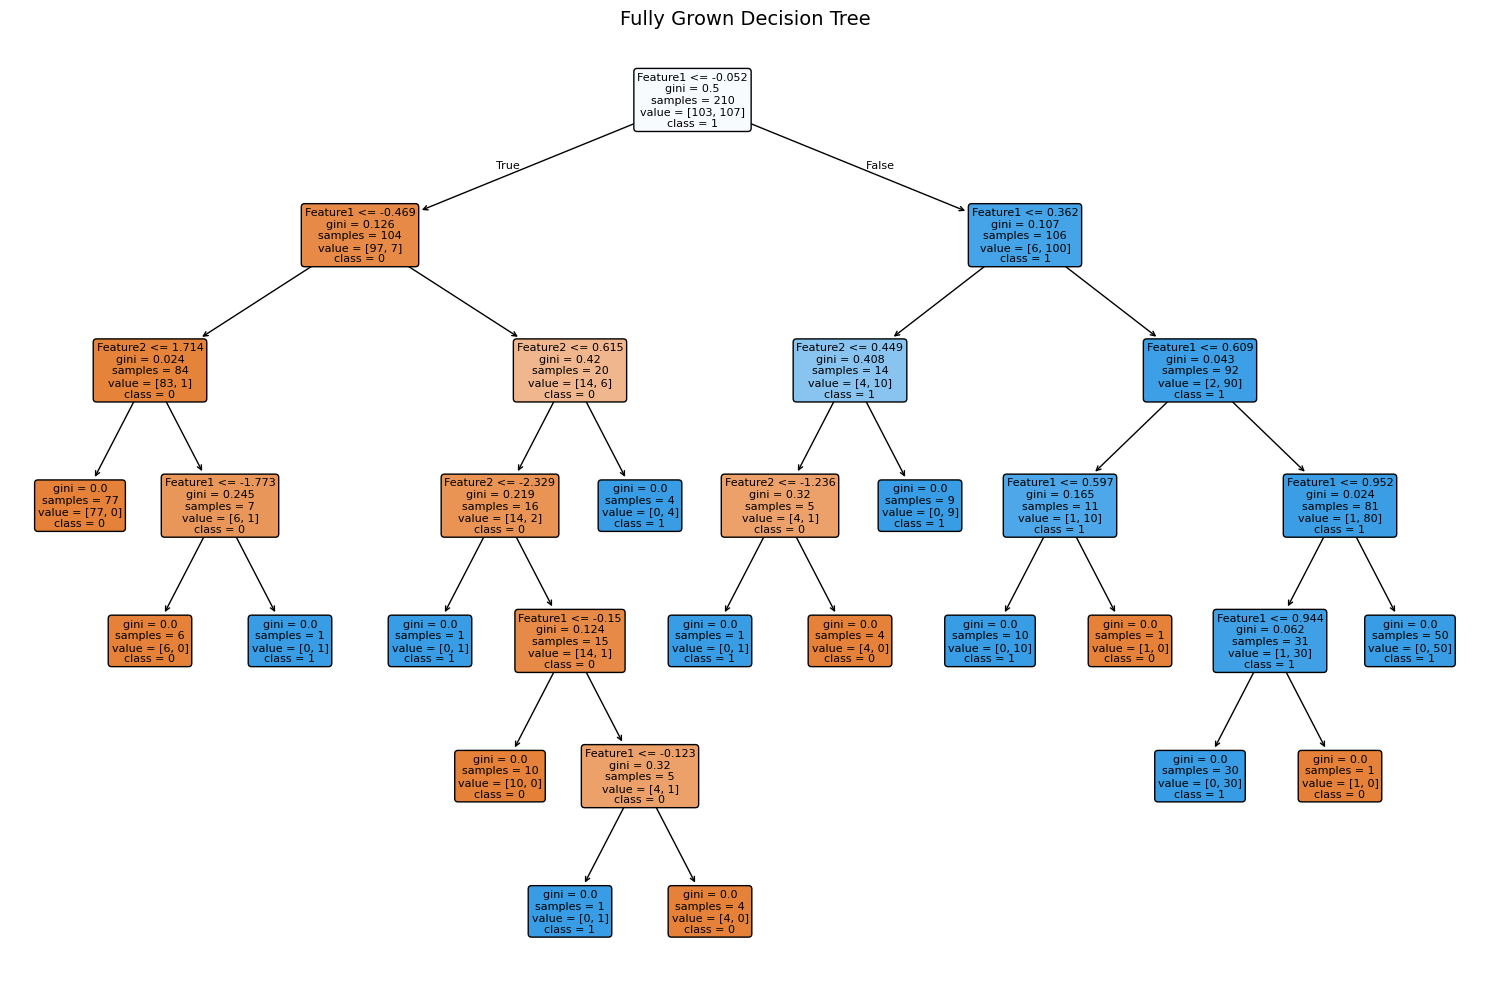

Full tree depth: 6
Number of leaves: 16
Depth 1: SSE = 9.0000
Depth 2: SSE = 9.0000
Depth 3: SSE = 4.0000
Depth 4: SSE = 4.0000
Depth 5: SSE = 4.0000
Depth 6: SSE = 4.0000


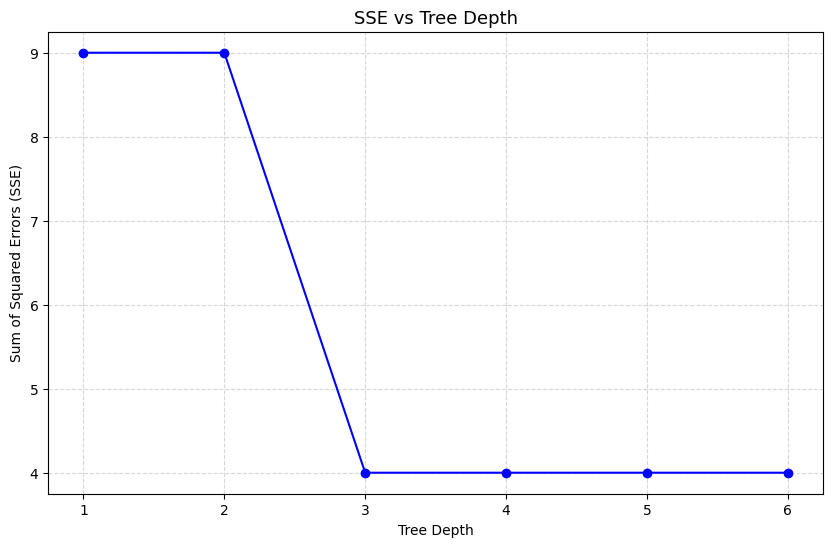


Optimal pruning depth selected: 2


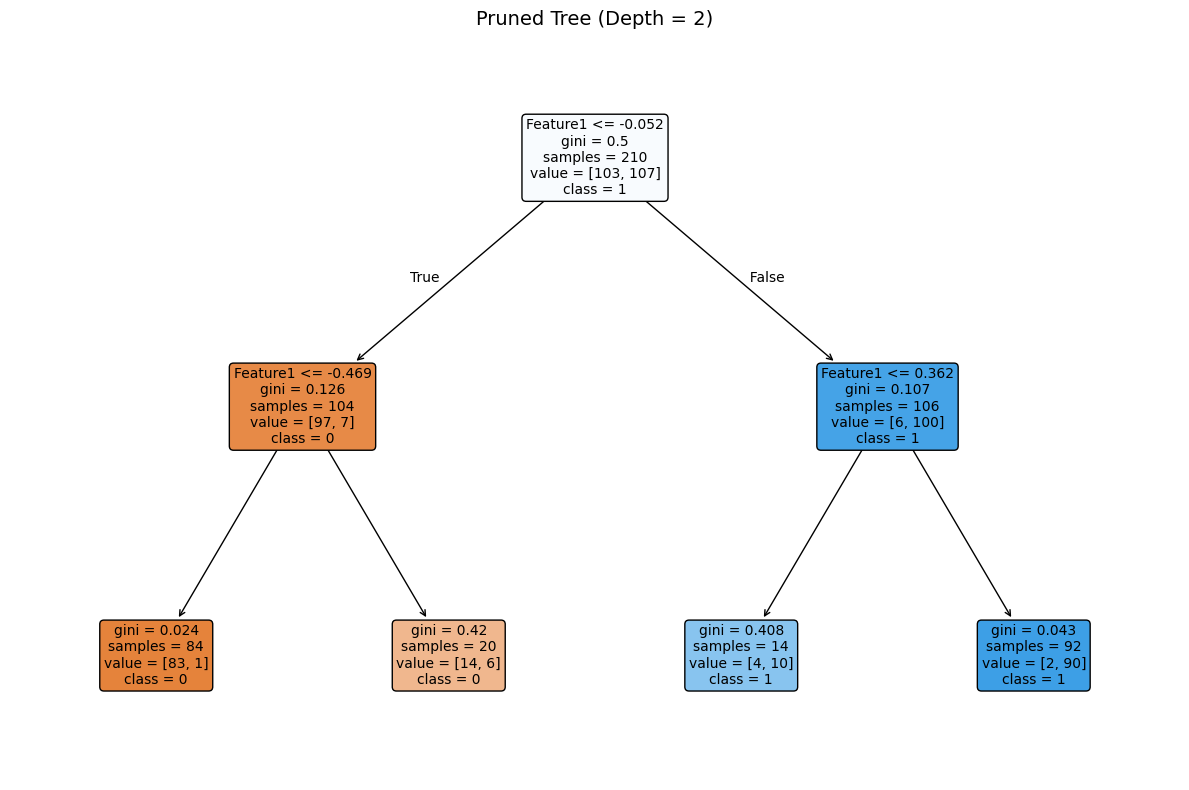


Full Tree - Accuracy: 0.9556, SSE: 4.0000
Pruned Tree - Accuracy: 0.9000, SSE: 9.0000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


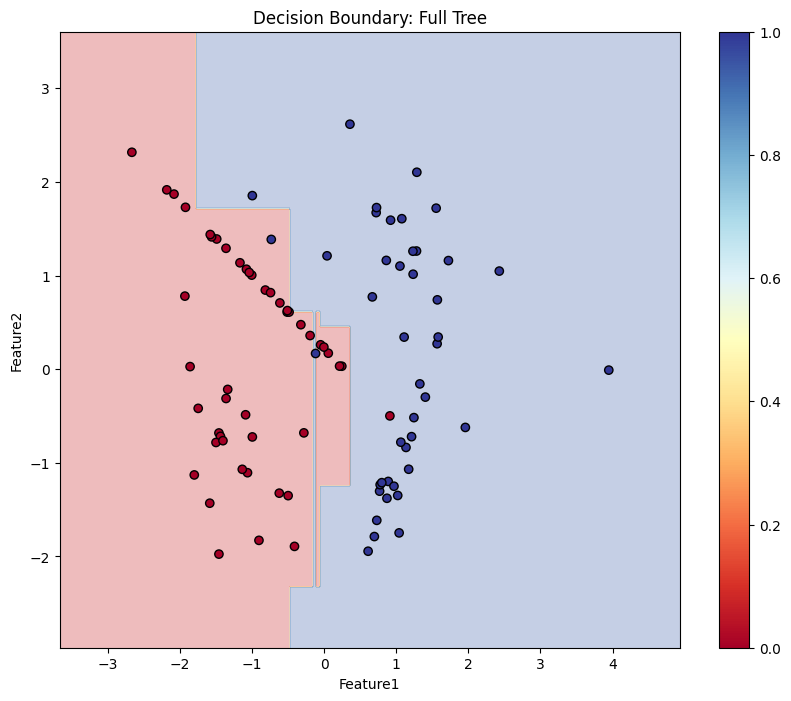

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


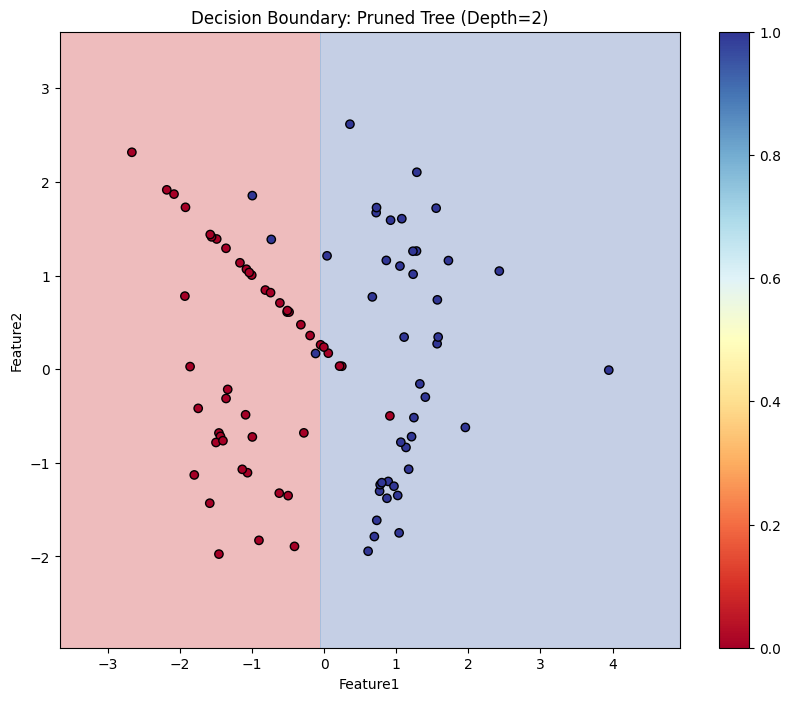

In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

try:
    train_df = pd.read_csv('A4_train_74e601c5-f446-4f34-a53b-28ce05d1cec4.csv')
    test_df = pd.read_csv('A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705.csv')
except:
    train_text = window.fs.readFile('A4_train_74e601c5-f446-4f34-a53b-28ce05d1cec4.csv', {'encoding': 'utf8'})
    test_text = window.fs.readFile('A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705.csv', {'encoding': 'utf8'})
    train_df = pd.read_csv(pd.io.common.StringIO(train_text))
    test_df = pd.read_csv(pd.io.common.StringIO(test_text))

X_train = train_df[['Feature1', 'Feature2']]
y_train = train_df['Label']
X_test = test_df[['Feature1', 'Feature2']]
y_test = test_df['Label']

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

full_model = DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1, random_state=42)
full_model.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(full_model, feature_names=['Feature1', 'Feature2'], class_names=['0', '1'],
          filled=True, rounded=True, fontsize=8)
plt.title("Fully Grown Decision Tree", fontsize=14)
plt.tight_layout()
plt.show()

print(f"Full tree depth: {full_model.get_depth()}")
print(f"Number of leaves: {full_model.get_n_leaves()}")

max_d = full_model.get_depth()
sse_per_depth = []

for depth in range(1, max_d + 1):
    temp_model = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    temp_model.fit(X_train, y_train)
    predictions = temp_model.predict(X_test)
    sse = mean_squared_error(y_test, predictions) * len(y_test)
    sse_per_depth.append(sse)
    print(f"Depth {depth}: SSE = {sse:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_d + 1), sse_per_depth, marker='o', linestyle='-', color='blue')
plt.title("SSE vs Tree Depth", fontsize=13)
plt.xlabel("Tree Depth")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(1, max_d + 1))
plt.show()

sse_deltas = np.abs(np.diff(sse_per_depth))
optimal_idx = np.argmin(sse_deltas)
optimal_depth = optimal_idx + 2

print(f"\nOptimal pruning depth selected: {optimal_depth}")

pruned_model = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=42)
pruned_model.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(pruned_model, feature_names=['Feature1', 'Feature2'], class_names=['0', '1'],
          filled=True, rounded=True, fontsize=10)
plt.title(f'Pruned Tree (Depth = {optimal_depth})', fontsize=14)
plt.tight_layout()
plt.show()

y_pred_full = full_model.predict(X_test)
y_pred_pruned = pruned_model.predict(X_test)

acc_full = accuracy_score(y_test, y_pred_full)
acc_pruned = accuracy_score(y_test, y_pred_pruned)
sse_full = mean_squared_error(y_test, y_pred_full) * len(y_test)
sse_pruned = mean_squared_error(y_test, y_pred_pruned) * len(y_test)

print(f"\nFull Tree - Accuracy: {acc_full:.4f}, SSE: {sse_full:.4f}")
print(f"Pruned Tree - Accuracy: {acc_pruned:.4f}, SSE: {sse_pruned:.4f}")

def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='RdYlBu', edgecolors='k')
    plt.colorbar(scatter)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_test, y_test, full_model, "Decision Boundary: Full Tree")
plot_decision_boundary(X_test, y_test, pruned_model, f"Decision Boundary: Pruned Tree (Depth={optimal_depth})")
